### Showing trends of cases and deaths from 7th-14th of September

In [2]:
#Imporitng libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#### Reading and preprocessing the data

In [3]:
#Reading the dataset
covid_data=pd.read_csv('../data/covid_large.csv')


In [4]:
#Converting the datatype to datetime format
covid_data['Date'] = covid_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

#### Choosing Texas state data

In [5]:
covid_statedata=covid_data.loc[covid_data['State'] == 'TX']

In [6]:
covid_statedata.dtypes

State                    object
countyFIPS                int64
County Name              object
Date             datetime64[ns]
Num of Cases              int64
Num of Deaths             int64
population                int64
dtype: object

In [7]:
#Choosing one week's data from 7th-14th September
start_date=datetime(2020,9,6)
end_date=datetime(2020,9,15)
mask = (covid_statedata['Date'] > start_date) & (covid_statedata['Date'] <= end_date)

In [8]:
#Applying mask to the dataset 
covid = covid_statedata.loc[mask]


In [9]:
#Final dataset with Texas state data
covid

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
608845,TX,0,statewide unallocated,2020-09-07,0,3,0
608846,TX,0,statewide unallocated,2020-09-08,0,3,0
608847,TX,0,statewide unallocated,2020-09-09,0,3,0
608848,TX,0,statewide unallocated,2020-09-10,0,3,0
608849,TX,0,statewide unallocated,2020-09-11,0,3,0
...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,274,13,11840
669047,TX,48507,zavala county,2020-09-11,275,14,11840
669048,TX,48507,zavala county,2020-09-12,282,14,11840
669049,TX,48507,zavala county,2020-09-13,282,14,11840


In [10]:
#Setting date as the index
covid=covid.set_index('Date')

In [11]:
#Grouping by date and adding all the county numbers in TX state on the same date for both cases and deaths
covid_test=covid.groupby('Date')['Num of Deaths'].sum()
covid_test1=covid.groupby('Date')['Num of Cases'].sum()

In [12]:
covid_test

Date
2020-09-07    13485
2020-09-08    13546
2020-09-09    13686
2020-09-10    13847
2020-09-11    13991
2020-09-12    14138
2020-09-13    14185
2020-09-14    14206
Name: Num of Deaths, dtype: int64

#### Deaths trend for the week

Text(0, 0.5, 'Deaths')

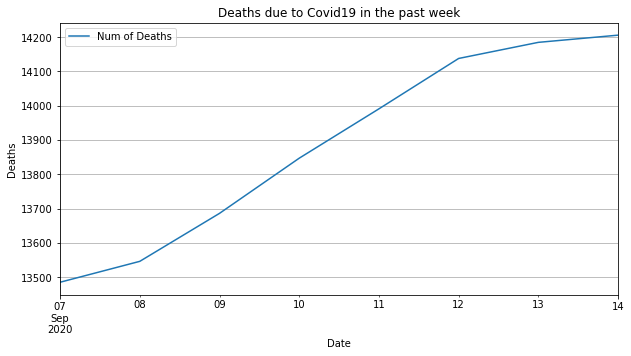

In [18]:
ax=covid_test.plot(title='Deaths due to Covid19 in the past week',figsize=(10,5), grid=True,legend=True)
ax.set_ylabel("Deaths")

#### The deaths in Texas state due to Covid19 are steadily increasing in the past week from 7th-13th, than they are a bit stable from 13th to 14th.

#### Covid death trends by day

Text(0, 0.5, 'Deaths')

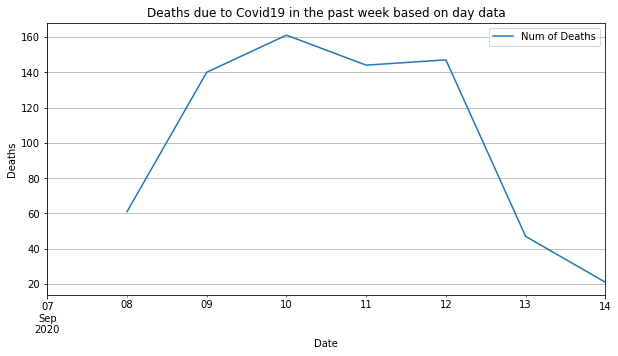

In [21]:
ax=covid_test.diff().plot(title='Deaths due to Covid19 in the past week based on day data',figsize=(10,5), grid=True,legend=True)
ax.set_ylabel("Deaths")

#### Cases trend for the week

Text(0, 0.5, 'COVID cases')

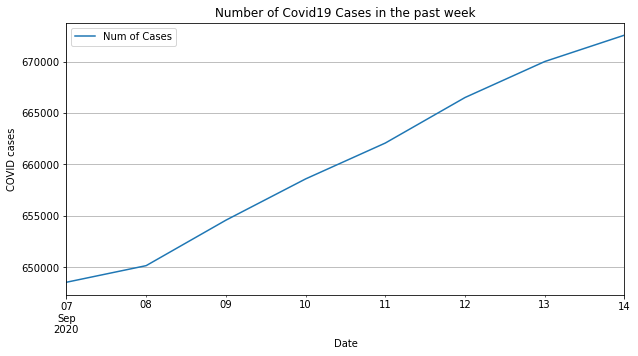

In [197]:

ax=covid_test1.plot(title='Number of Covid19 Cases in the past week',figsize=(10,5), grid=True,legend=True)
ax.set_ylabel("COVID cases")

#### The cases in Texas week are steadily increasing in the past week.

#### Covid cases trends by day

Text(0, 0.5, 'Covid cases')

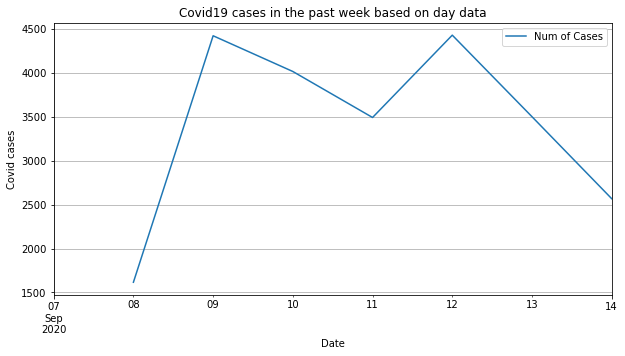

In [22]:
ax=covid_test1.diff().plot(title='Covid19 cases in the past week based on day data',figsize=(10,5), grid=True,legend=True)
ax.set_ylabel("Covid cases")

### Merging employee enrichment dataset with super covid dataset

In [50]:
#Importing libraries
import pandas as pd

#### Reading the data and preprocessing it

In [170]:
#Loading the enrichment employee dataset
emp_data=pd.read_excel('../data/employment.xlsx')

In [171]:
emp_data.head()

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,...,Industry,Status Code,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,US000,US,0.0,0,10,2020,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,10447240,147279523,147858938,147088945,2341897353925,1222,1.0,1.0
1,US000,US,0.0,1,10,2020,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,61014,2838417,2839463,2857289,56666068074,1532,1.0,1.0
2,US000,US,0.0,2,10,2020,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,69931,4631048,4704637,4710894,74670024998,1227,1.0,1.0
3,US000,US,0.0,3,10,2020,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,171065,14520838,14657450,14681375,195835097606,1030,1.0,1.0
4,US000,US,0.0,5,10,2020,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,10145230,125289220,125657388,124839387,2014726163247,1237,1.0,1.0


In [172]:
#Converting all the Area names to lower case for consistency
emp_data['Area'] = emp_data['Area'].apply(lambda cn: cn.lower().strip())

In [173]:
#Selecting only rows which are of Area type 'County'
emp_data=emp_data.loc[emp_data['Area Type']=='County']

In [174]:
#Preprocessing the column to match countyFIPS in covid dataset(4 digit area codes are there as 5 digit with a leading zero so removing them)
emp_data['Area\nCode']=emp_data['Area\nCode'].apply(lambda x : x[1:] if x.startswith("0") else x) 

In [176]:
emp_data.head(20)

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,...,Industry,Status Code,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
35,1001,01,1.0,0,10,2020,1,County,Alabama,"autauga county, alabama",...,"10 Total, all industries",NaN,910,11085,11047,11070,119509163,831,1.00,1.00
36,1001,01,1.0,1,10,2020,1,County,Alabama,"autauga county, alabama",...,"10 Total, all industries",NaN,10,81,84,85,1073296,991,0.40,0.37
37,1001,01,1.0,2,10,2020,1,County,Alabama,"autauga county, alabama",...,"10 Total, all industries",NaN,19,579,586,573,6926871,920,1.62,1.82
38,1001,01,1.0,3,10,2020,1,County,Alabama,"autauga county, alabama",...,"10 Total, all industries",NaN,32,1903,1925,1940,19222214,769,1.76,1.92
39,1001,01,1.0,5,10,2020,1,County,Alabama,"autauga county, alabama",...,"10 Total, all industries",NaN,849,8522,8452,8472,92286782,837,0.90,0.90
40,1001,01,1.0,5,101,2020,1,County,Alabama,"autauga county, alabama",...,101 Goods-producing,NaN,138,2320,2241,2224,35980188,1224,1.36,1.84
41,1001,01,1.0,5,1011,2020,1,County,Alabama,"autauga county, alabama",...,1011 Natural resources and mining,NaN,25,178,178,180,3034117,1306,1.35,1.94
42,1001,01,1.0,5,1012,2020,1,County,Alabama,"autauga county, alabama",...,1012 Construction,NaN,90,540,476,485,6528005,1004,0.89,1.10
43,1001,01,1.0,5,1013,2020,1,County,Alabama,"autauga county, alabama",...,1013 Manufacturing,NaN,23,1602,1587,1559,26418066,1284,1.64,2.19
44,1001,01,1.0,5,102,2020,1,County,Alabama,"autauga county, alabama",...,102 Service-providing,NaN,711,6202,6211,6248,56306594,696,0.80,0.68


In [177]:
#Selecting rows based on few industries
emp_data=emp_data.loc[emp_data['Industry'].isin(['10 Total, all industries','1021 Trade, transportation, and utilities','1013 Manufacturing','1024 Professional and business services'])]

In [178]:
#Removing total covered as we can add up state,federal,local and private count to get that number
emp_data=emp_data.loc[emp_data['Ownership']!='Total Covered']

In [179]:
#Removing the rows wih status code as 'N' as they are not being updated
emp_data=emp_data.loc[emp_data['Status Code']!='N']

In [126]:
emp_data.columns

Index(['Area\nCode', 'St', 'Cnty', 'Own', 'NAICS', 'Year', 'Qtr', 'Area Type',
       'St Name', 'Area', 'Ownership', 'Industry', 'Status Code',
       'Establishment Count', 'January Employment', 'February Employment',
       'March Employment', 'Total Quarterly Wages', 'Average Weekly Wage',
       'Employment Location Quotient Relative to U.S.',
       'Total Wage Location Quotient Relative to U.S.'],
      dtype='object')

In [180]:
#Removing the unecessary variables
emp_data = emp_data.drop(['St','Cnty','NAICS','Year','Qtr','Area Type','Status Code'], 1)


In [181]:
#Removing some unknown or undefined data in counties
emp_data = emp_data[emp_data['Area'].str.contains('county', na=False)]

In [182]:
#Displaying the processed dataset
emp_data.head(20)

,Area\nCode,Own,St Name,Area,Ownership,Industry,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
36,1001,1,Alabama,"autauga county, alabama",Federal Government,"10 Total, all industries",10,81,84,85,1073296,991,0.40,0.37
37,1001,2,Alabama,"autauga county, alabama",State Government,"10 Total, all industries",19,579,586,573,6926871,920,1.62,1.82
38,1001,3,Alabama,"autauga county, alabama",Local Government,"10 Total, all industries",32,1903,1925,1940,19222214,769,1.76,1.92
39,1001,5,Alabama,"autauga county, alabama",Private,"10 Total, all industries",849,8522,8452,8472,92286782,837,0.90,0.90
43,1001,5,Alabama,"autauga county, alabama",Private,1013 Manufacturing,23,1602,1587,1559,26418066,1284,1.64,2.19
45,1001,5,Alabama,"autauga county, alabama",Private,"1021 Trade, transportation, and utilities",201,2135,2122,2120,24402962,883,1.04,1.35
48,1001,5,Alabama,"autauga county, alabama",Private,1024 Professional and business services,117,616,629,622,7860099,972,0.39,0.34
53,1003,1,Alabama,"baldwin county, alabama",Federal Government,"10 Total, all industries",34,351,349,364,5076102,1101,0.25,0.29
54,1003,2,Alabama,"baldwin county, alabama",State Government,"10 Total, all industries",38,1070,1219,1211,11414846,753,0.50,0.50
55,1003,3,Alabama,"baldwin county, alabama",Local Government,"10 Total, all industries",91,8556,8581,8690,92381972,825,1.14,1.53


In [130]:
#Reading the covid super dataset
covid=pd.read_csv('../data/covid_large.csv')

In [131]:
#Converting object type to int to be able to merge the data with the countyFIPS column which is int
emp_data['Area\nCode']=emp_data['Area\nCode'].astype(str).astype(int)

#### Merging the original and enrichment dataset

In [132]:
df = pd.merge(covid,emp_data,left_on='countyFIPS',right_on='Area\nCode')

In [133]:
#Removing duplicate columns
df = df.drop(['Area\nCode','Area','St Name'], 1)


In [184]:
#Displaying the dataset
df

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Own,Ownership,Industry,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,AL,1001,autauga county,2020-01-22,0,0,55869,1,Federal Government,"10 Total, all industries",10,81,84,85,1073296,991,0.40,0.37
1,AL,1001,autauga county,2020-01-22,0,0,55869,2,State Government,"10 Total, all industries",19,579,586,573,6926871,920,1.62,1.82
2,AL,1001,autauga county,2020-01-22,0,0,55869,3,Local Government,"10 Total, all industries",32,1903,1925,1940,19222214,769,1.76,1.92
3,AL,1001,autauga county,2020-01-22,0,0,55869,5,Private,"10 Total, all industries",849,8522,8452,8472,92286782,837,0.90,0.90
4,AL,1001,autauga county,2020-01-22,0,0,55869,5,Private,1013 Manufacturing,23,1602,1587,1559,26418066,1284,1.64,2.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706578,WY,56045,weston county,2020-09-14,23,0,6927,2,State Government,"10 Total, all industries",12,144,143,143,1863234,1000,1.95,2.38
4706579,WY,56045,weston county,2020-09-14,23,0,6927,3,Local Government,"10 Total, all industries",21,626,631,630,5906403,722,2.76,2.88
4706580,WY,56045,weston county,2020-09-14,23,0,6927,5,Private,"10 Total, all industries",250,1518,1508,1465,16128384,829,0.75,0.76
4706581,WY,56045,weston county,2020-09-14,23,0,6927,5,Private,"1021 Trade, transportation, and utilities",61,416,408,407,3326262,624,0.96,0.89


In [164]:
#Exporting part of the merged dataset to a csv file
df[:700000].to_csv('../data/emp_covid.csv',index=False)

In [160]:
df.dtypes

State                                             object
countyFIPS                                         int64
County Name                                       object
Date                                              object
Num of Cases                                       int64
Num of Deaths                                      int64
population                                         int64
Own                                                int64
Ownership                                         object
Industry                                          object
Establishment Count                                int64
January Employment                                 int64
February Employment                                int64
March Employment                                   int64
Total Quarterly Wages                              int64
Average Weekly Wage                                int64
Employment Location Quotient Relative to U.S.    float64
Total Wage Location Quotient Re